Data Loading

In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishchaudhary9523/personality-dataset")

print("Path to dataset files:", path)

100%|██████████| 14.2k/14.2k [00:00<00:00, 13.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ashishchaudhary9523/personality-dataset/versions/1


In [3]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/ashishchaudhary9523/personality-dataset/versions/1"
print("Files in dataset folder:", os.listdir(dataset_path))


Files in dataset folder: ['personality_dataset-final.csv']


In [4]:
import pandas as pd

# Adjust filename if it differs
csv_file = os.path.join(dataset_path, "personality_dataset-final.csv")
df = pd.read_csv(csv_file)

# Quick check
print("Dataset Shape:", df.shape)
display(df.head())


Dataset Shape: (2900, 8)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


## Data exploration

Time_spent_Alone             float64
Stage_fear                     int64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing      int64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dtype: object
       Time_spent_Alone   Stage_fear  Social_event_attendance  Going_outside  \
count       2900.000000  2900.000000              2900.000000    2900.000000   
mean           4.505816     0.486207                 3.963354       3.000000   
std            3.441180     0.499896                 2.872608       2.221597   
min            0.000000     0.000000                 0.000000       0.000000   
25%            2.000000     0.000000                 2.000000       1.000000   
50%            4.000000     0.000000                 3.963354       3.000000   
75%            7.000000     1.000000                 6.000000       5.000000   
max           11.000000     1.000000              

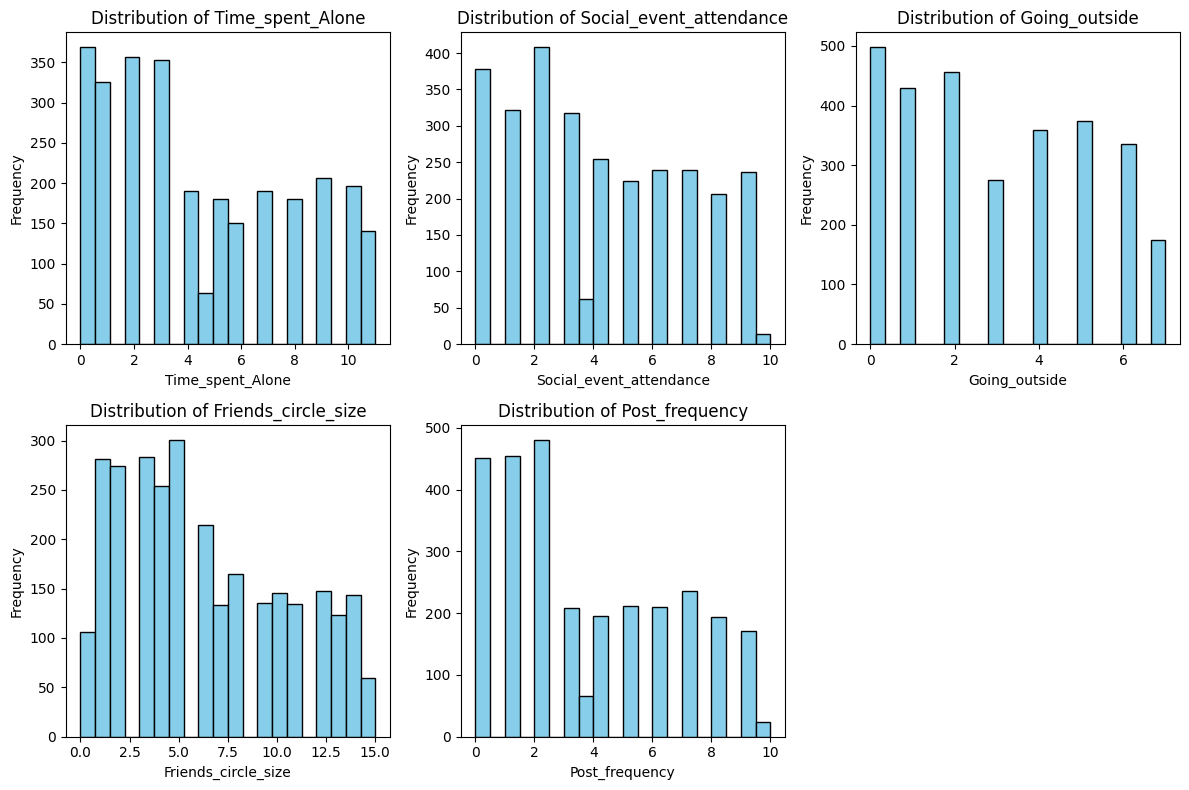

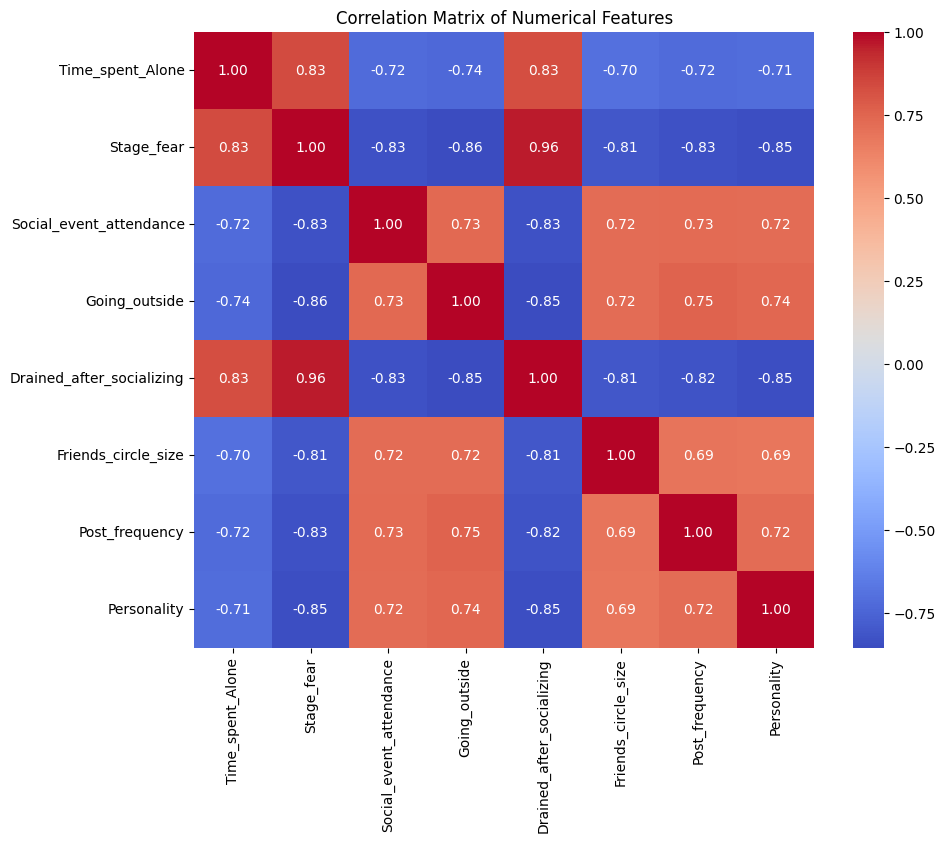

The target variable is: Personality


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print(df.dtypes)

# 2. Descriptive statistics for numerical features
print(df.describe())

# 3. Value counts for categorical features
for col in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

# 4. Visualize numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 5. Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Determine the target variable
# 'Personality' appears to be the target variable as it's the outcome we want to predict.
target_variable = 'Personality'
print(f"The target variable is: {target_variable}")

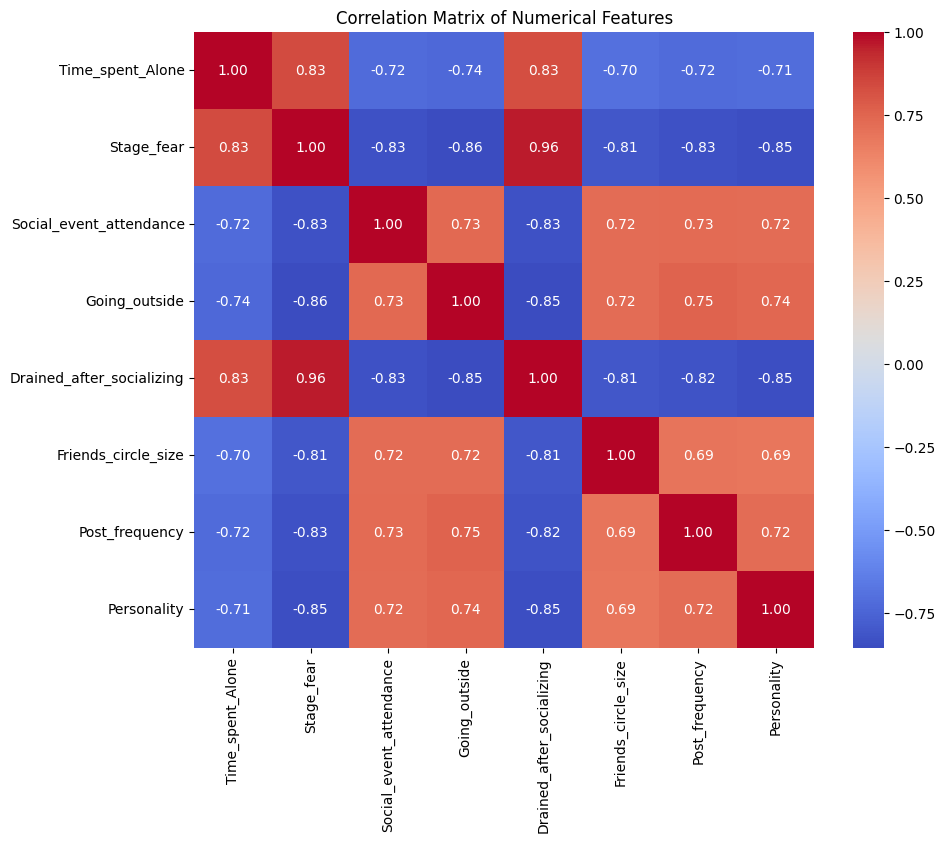

In [6]:
# 5. Correlation matrix and heatmap
correlation_matrix = df.corr(numeric_only= True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

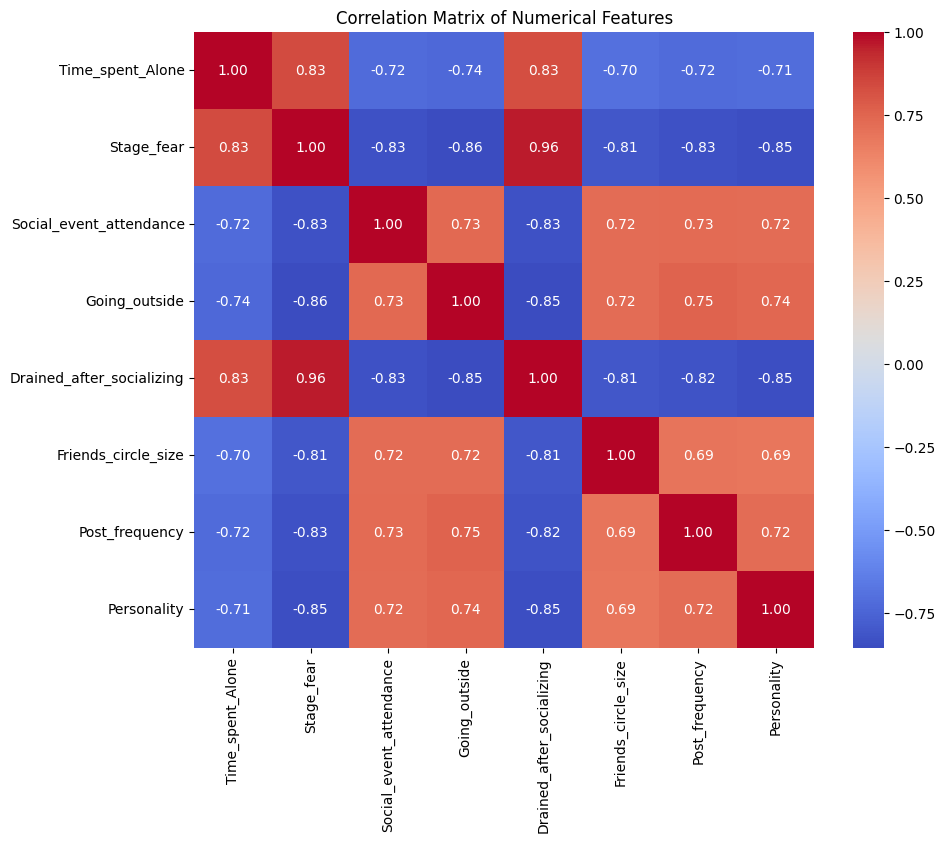

The target variable is: Personality


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types (already done)
# 2. Descriptive statistics for numerical features (already done)
# 3. Value counts for categorical features (already done)
# 4. Visualize numerical features (already done, but with a ValueError)

# 5. Correlation matrix and heatmap (handle non-numeric data)
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Determine the target variable (already done)
target_variable = 'Personality'
print(f"The target variable is: {target_variable}")

## Data cleaning

In [8]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [10]:
for col in df.columns:
  print(col)
  print(df[col].dtype)
  print(df[col].nunique())
  print("------------------------------")

Time_spent_Alone
float64
13
------------------------------
Stage_fear
int64
2
------------------------------
Social_event_attendance
float64
12
------------------------------
Going_outside
float64
8
------------------------------
Drained_after_socializing
int64
2
------------------------------
Friends_circle_size
float64
17
------------------------------
Post_frequency
float64
12
------------------------------
Personality
int64
2
------------------------------


In [11]:
# Missing Value Imputation
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

# Duplicate Removal
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {num_duplicates}")

# Outlier Detection and Handling (IQR Method)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    df.loc[(df[col] < lower_bound), col] = lower_bound
    df.loc[(df[col] > upper_bound), col] = upper_bound
    print(f"Number of outliers replaced in '{col}': {num_outliers}")


Number of duplicate rows removed: 402
Number of outliers replaced in 'Time_spent_Alone': 0
Number of outliers replaced in 'Stage_fear': 0
Number of outliers replaced in 'Social_event_attendance': 0
Number of outliers replaced in 'Going_outside': 0
Number of outliers replaced in 'Drained_after_socializing': 0
Number of outliers replaced in 'Friends_circle_size': 0
Number of outliers replaced in 'Post_frequency': 0
Number of outliers replaced in 'Personality': 0


/tmp/ipython-input-2462501089.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < lower_bound), col] = lower_bound
/tmp/ipython-input-2462501089.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < lower_bound), col] = lower_bound
/tmp/ipython-input-2462501089.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < lower_bound), col] = lower_bound


In [12]:
# Missing Value Imputation
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

# Duplicate Removal
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {num_duplicates}")

# Outlier Detection and Handling (IQR Method)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    df.loc[(df[col] < lower_bound), col] = lower_bound
    df.loc[(df[col] > upper_bound), col] = upper_bound
    print(f"Number of outliers replaced in '{col}': {num_outliers}")

Number of duplicate rows removed: 0
Number of outliers replaced in 'Time_spent_Alone': 0
Number of outliers replaced in 'Stage_fear': 0
Number of outliers replaced in 'Social_event_attendance': 0
Number of outliers replaced in 'Going_outside': 0
Number of outliers replaced in 'Drained_after_socializing': 0
Number of outliers replaced in 'Friends_circle_size': 0
Number of outliers replaced in 'Post_frequency': 0
Number of outliers replaced in 'Personality': 0


# Data **preparation**

In [13]:
# Identify categorical columns
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

# Check the shape of the encoded DataFrame
print(df_encoded.shape)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_1.0,Drained_after_socializing_1.0,Personality_1.0
0,4.0,4.0,6.0,13.0,5.0,False,False,True
1,9.0,0.0,0.0,0.0,3.0,True,True,False
2,9.0,1.0,2.0,5.0,2.0,True,True,False
3,0.0,6.0,7.0,14.0,8.0,False,False,True
4,3.0,9.0,4.0,8.0,5.0,False,False,True


(2498, 8)


## Feature engineering

In [15]:
# Features (all columns except 'Personality')
X = df.drop(columns=['Personality'])
y = df['Personality']

# Quick check
print(X.head())
print(y.value_counts())


   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         0.0                      4.0            6.0   
1               9.0         1.0                      0.0            0.0   
2               9.0         1.0                      1.0            2.0   
3               0.0         0.0                      6.0            7.0   
4               3.0         0.0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  
0                        0.0                 13.0             5.0  
1                        1.0                  0.0             3.0  
2                        1.0                  5.0             2.0  
3                        0.0                 14.0             8.0  
4                        0.0                  8.0             5.0  
Personality
1.0    1403
0.0    1095
Name: count, dtype: int64


## Scaling (helps KNN, Logistic Regression)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Train/Test **Split**

In [18]:
from sklearn.model_selection import train_test_split

# 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)


Train: (1748, 7) Validation: (375, 7) Test: (375, 7)


## Baseline Classifiers

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    print(f"\n{name} Validation Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))



Logistic Regression Validation Accuracy: 0.9067
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       164
         1.0       0.90      0.94      0.92       211

    accuracy                           0.91       375
   macro avg       0.91      0.90      0.90       375
weighted avg       0.91      0.91      0.91       375


KNN Validation Accuracy: 0.9173
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       164
         1.0       0.92      0.93      0.93       211

    accuracy                           0.92       375
   macro avg       0.92      0.91      0.92       375
weighted avg       0.92      0.92      0.92       375


Decision Tree Validation Accuracy: 0.8693
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       164
         1.0       0.89      0.88      0.88       211

    accuracy                           0.87       375
   

## Hyperparameter Tuning (GridSearchCV)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=500, random_state=42),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy: 0.9267703643061809


## Final Evaluation on Test Set

In [21]:
best_model = grid.best_estimator_  # example using LR
y_test_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.928
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       165
         1.0       0.93      0.95      0.94       210

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375

